In [1]:
!git clone -l -s git://github.com/engrhamzaaliimran/cvassignmentdataset.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 4111, done.
remote: Total 4111 (delta 0), reused 0 (delta 0), pack-reused 4111
Receiving objects: 100% (4111/4111), 1.64 GiB | 40.43 MiB/s, done.
Checking out files: 100% (4429/4429), done.
/content/cloned-repo
Cyclone_Wildfire_Flood_Earthquake_Database


In [0]:
#For making directories: ['train', 'validation', test] 
#with  subdirectories: ['Cyclone', 'Earthquake', 'Flood', 'Wildfire']

import os

base_dir = '/content/base_data'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

Cyclone_dir = os.path.join(train_dir, 'Cyclone')
os.mkdir(Cyclone_dir)
Earthquake_dir = os.path.join(train_dir, 'Earthquake')
os.mkdir(Earthquake_dir)
Flood_dir = os.path.join(train_dir, 'Flood')
os.mkdir(Flood_dir)
Wildfire = os.path.join(train_dir, 'Wildfire')
os.mkdir(Wildfire)

Cyclone_dir = os.path.join(validation_dir, 'Cyclone')
os.mkdir(Cyclone_dir)
Earthquake_dir = os.path.join(validation_dir, 'Earthquake')
os.mkdir(Earthquake_dir)
Flood_dir = os.path.join(validation_dir, 'Flood')
os.mkdir(Flood_dir)
Wildfire = os.path.join(validation_dir, 'Wildfire')
os.mkdir(Wildfire)

Cyclone_dir = os.path.join(test_dir, 'Cyclone')
os.mkdir(Cyclone_dir)
Earthquake_dir = os.path.join(test_dir, 'Earthquake')
os.mkdir(Earthquake_dir)
Flood_dir = os.path.join(test_dir, 'Flood')
os.mkdir(Flood_dir)
Wildfire = os.path.join(test_dir, 'Wildfire')
os.mkdir(Wildfire)

In [0]:
# For Resizing to 150x150 and then saving the images to test train and validation folders
# under the respective subdirectories: ['Cyclone', 'Earthquake', 'Flood', 'Wildfire']
import os
from PIL import Image

train = '/content/base_data/train/Flood'
validation = '/content/base_data/validation/Flood'
test = '/content/base_data/test/Flood'

path = '/content/cloned-repo/Cyclone_Wildfire_Flood_Earthquake_Database/Flood'
fnames = os.listdir(path)

for i in range(700):
    src = os.path.join(path, fnames[i])
    dst = os.path.join(train, fnames[i])
    im = Image.open(src)
    imResize = im.resize((150,150),Image.ANTIALIAS)
    imResize.save(dst,quality=90)

for i in range(700,850):
    src = os.path.join(path, fnames[i])
    dst = os.path.join(validation, fnames[i])
    im = Image.open(src)
    imResize = im.resize((150, 150), Image.ANTIALIAS)
    imResize.save(dst, quality=90)

for i in range(850,1000):
    src = os.path.join(path, fnames[i])
    dst = os.path.join(test, fnames[i])
    im = Image.open(src)
    imResize = im.resize((150, 150), Image.ANTIALIAS)
    imResize.save(dst, quality=90)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

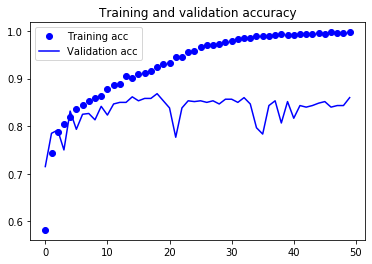

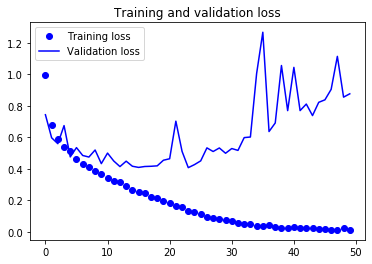

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers.core import Dense, Activation, Flatten

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_dir = '/content/base_data/train'
validation_dir = '/content/base_data/validation/'

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

batchSize = 20
trainSamples = 2800
validationSamples = 600

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        classes = ['Cyclone','Earthquake','Flood','Wildfire'],
        batch_size=batchSize,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        classes = ['Cyclone','Earthquake','Flood','Wildfire'],
        target_size=(150, 150),
        batch_size=batchSize,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

filepath='/content/sample_data/best.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(
      train_generator,
      steps_per_epoch=trainSamples//batchSize,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validationSamples//batchSize,
      callbacks=callbacks_list)

model.save('disaster_model')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
import numpy as np

testSamples = 528
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = '/content/base_data/test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        classes = ['Cyclone','Earthquake','Flood','Wildfire'],
        batch_size=2,
        class_mode='categorical',
        shuffle=False)

Y_pred = model.predict_generator(test_generator, testSamples // 2)
y_pred = np.argmax(Y_pred, axis=1)
# print(y_pred)
# print(test_generator.classes)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ['Cyclone', 'Earthquake', 'Flood','Wildfire']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Found 528 images belonging to 4 classes.
Confusion Matrix
[[ 69   3   1   5]
 [  2 134  10   4]
 [  5  17 124   4]
 [  5   9   3 133]]
Classification Report
              precision    recall  f1-score   support

     Cyclone       0.85      0.88      0.87        78
  Earthquake       0.82      0.89      0.86       150
       Flood       0.90      0.83      0.86       150
    Wildfire       0.91      0.89      0.90       150

    accuracy                           0.87       528
   macro avg       0.87      0.87      0.87       528
weighted avg       0.87      0.87      0.87       528

